<a href="https://colab.research.google.com/github/Subhranshu-123/BIKE2/blob/main/Copy_of_meshgrid%2Ccounterf_in_logistic%2C_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import svm, datasets

    # Load a sample dataset or create your own
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # We take only the first two features for 2D plotting
    y = iris.target

In [ ]:
    # Create an SVM classifier (e.g., with a linear kernel)
    clf = svm.SVC(kernel='linear')
    clf.fit(X, y)

SVC(kernel='linear')

In [ ]:
    # Determine min/max for features to create the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

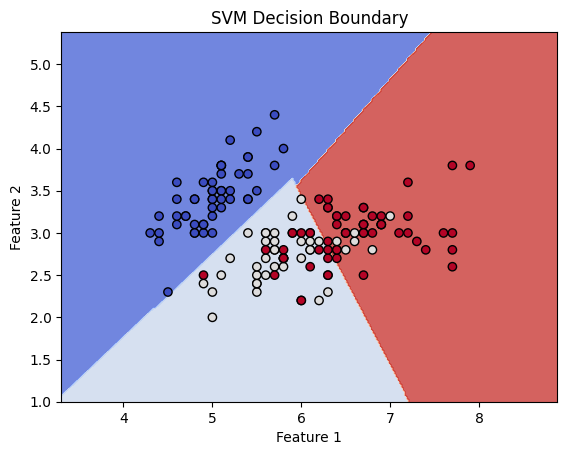

In [ ]:
    # Predict class labels or decision function values for the meshgrid points
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # For class labels
    # Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # For decision function values

    # Reshape the predictions to match the meshgrid shape
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary using contour or contourf
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) # For class labels
    # plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']) # For decision function

    # Plot the original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Highlight support vectors (if using SVC)
    # plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
    #             facecolors='none', edgecolors='k', linewidth=1)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

data=load_iris()
data_df = pd.DataFrame(data = data.data,
                       columns = data.feature_names)
print("Target values (encoded):", set(data.target))
print("Target class labels:", data.target_names)
print(data_df.head().T)

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("softmax Iris Accuracy:", accuracy_score(y_test, y_pred))

Target values (encoded): {np.int64(0), np.int64(1), np.int64(2)}
Target class labels: ['setosa' 'versicolor' 'virginica']
                     0    1    2    3    4
sepal length (cm)  5.1  4.9  4.7  4.6  5.0
sepal width (cm)   3.5  3.0  3.2  3.1  3.6
petal length (cm)  1.4  1.4  1.3  1.5  1.4
petal width (cm)   0.2  0.2  0.2  0.2  0.2
softmax Iris Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
    from sklearn.svm import SVC
    # ... (data loading and splitting)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale') # 'scale' or a specific float value
    svm_rbf.fit(X_train, y_train)

SVC()

In [ ]:
    from sklearn.svm import SVC
    # ... (data loading and splitting)
    svm_poly = SVC(kernel='poly', degree=3, C=1.0, coef0=1.0)
    svm_poly.fit(X_train, y_train)

SVC(coef0=1.0, kernel='poly')

In [ ]:
    from sklearn.svm import SVC
    # ... (data loading and splitting)
    svm_sigmoid = SVC(kernel='sigmoid', C=1.0, coef0=0.0)
    svm_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [ ]:
clf_rbf = SVC(kernel='rbf', gamma=0.5, C=10)
clf_rbf.fit(X_train[:, :2], y_train)
print("RBF Kernel SVM Accuracy:", clf_rbf.score(X_test[:, :2], y_test))

RBF Kernel SVM Accuracy: 0.8157894736842105


In [ ]:
clf_poly = SVC(kernel='poly', degree=3, C=1)
clf_poly.fit(X_train[:, :2], y_train)
print("Polynomial Kernel SVM Accuracy:", clf_poly.score(X_test[:, :2], y_test))

Polynomial Kernel SVM Accuracy: 0.7631578947368421


In [ ]:
clf_poly = SVC(kernel='poly', degree=3, C=1)
clf_poly.fit(X_train, y_train)
print("Polynomial Kernel SVM Accuracy:", clf_poly.score(X_test, y_test))

Polynomial Kernel SVM Accuracy: 0.9736842105263158


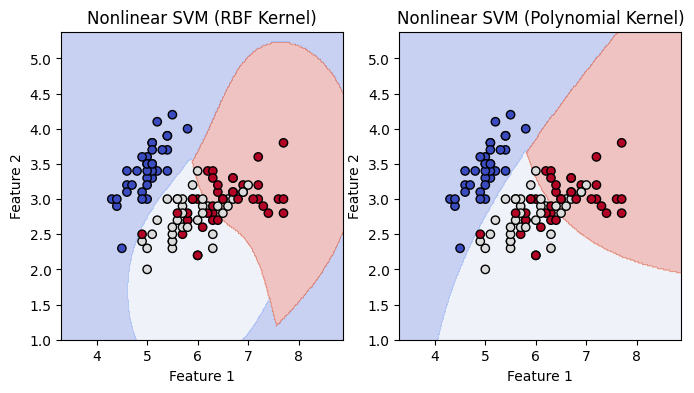

In [ ]:
# Plot decision boundaries
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
for i, (clf, title) in enumerate([(clf_rbf, 'RBF Kernel'), (clf_poly, 'Polynomial Kernel')]):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    axs[i].contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    axs[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
    axs[i].set_title(f"Nonlinear SVM ({title})")
    axs[i].set_xlabel("Feature 1")
    axs[i].set_ylabel("Feature 2")

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>